In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from collections import Counter

def klemm_eguiluz(n, m, mu):
    # initial condition of complete graphs with m nodes
    G = nx.complete_graph(m)
    # used to represent whether or not a node is activated(1) or deactivated(0)
    activation = list(np.ones(m))
    mu_factor = np.random.ranf(m)
    
    for i in range(m, n):
        # generate list of edges which are to be randomly rewired
        mu_factor = np.random.ranf(m) < mu
        activated = np.where(np.array(activation) == 1)[0]

        targets = set([activated[j] for j in range(m) if mu_factor[j] == 0])
        
        # Linear preferential attachment
        p_total = np.array(list(map(G.degree, range(i))))
        p_dstr = p_total / sum(p_total)
        
        while len(targets) < m:
            targets.add(np.random.choice(list(range(i)), p = p_dstr))
        G.add_edges_from(zip(np.full(m, i), list(targets)))
        
        # Activation and deactivation where p = a / k, and 1/a = sum of 1/k
        
        k =  np.array([G.degree(active)**-1 for active in activated])
        a = sum(k)
        p_deact = k / a
        deactivated = np.random.choice(activated, p = p_deact)
        activation[deactivated] = 0
        activation.append(1)
                
    return G     

Done with mu: 0.5
Done with mu: 0.5
Done with mu: 0.501
Done with mu: 0.502
Done with mu: 0.503
Done with mu: 0.504
Done with mu: 0.505
Done with mu: 0.506
Done with mu: 0.507
Done with mu: 0.508
Done with mu: 0.509
Done with mu: 0.51
Done with mu: 0.511
Done with mu: 0.512
Done with mu: 0.513
Done with mu: 0.514
Done with mu: 0.515
Done with mu: 0.516
Done with mu: 0.517
Done with mu: 0.518
Done with mu: 0.519
Done with mu: 0.52
Done with mu: 0.521
Done with mu: 0.522
Done with mu: 0.523
Done with mu: 0.524
Done with mu: 0.525
Done with mu: 0.526
Done with mu: 0.527
Done with mu: 0.528
Done with mu: 0.529
Done with mu: 0.53
Done with mu: 0.531
Done with mu: 0.532
Done with mu: 0.533
Done with mu: 0.534
Done with mu: 0.535
Done with mu: 0.536
Done with mu: 0.537
Done with mu: 0.538
Done with mu: 0.539
Done with mu: 0.54
Done with mu: 0.541
Done with mu: 0.542
Done with mu: 0.543
Done with mu: 0.544
Done with mu: 0.545
Done with mu: 0.546
Done with mu: 0.547
Done with mu: 0.548
Done wit

Done with mu: 0.7730000000000002
Done with mu: 0.7740000000000002
Done with mu: 0.7750000000000002
Done with mu: 0.7760000000000002
Done with mu: 0.7770000000000002
Done with mu: 0.7780000000000002
Done with mu: 0.7790000000000002
Done with mu: 0.7800000000000002
Done with mu: 0.7810000000000002
Done with mu: 0.7820000000000003
Done with mu: 0.7830000000000003
Done with mu: 0.7840000000000003
Done with mu: 0.7850000000000003
Done with mu: 0.7860000000000003
Done with mu: 0.7870000000000003
Done with mu: 0.7880000000000003
Done with mu: 0.7890000000000003
Done with mu: 0.7900000000000003
Done with mu: 0.7910000000000003
Done with mu: 0.7920000000000003
Done with mu: 0.7930000000000003
Done with mu: 0.7940000000000003
Done with mu: 0.7950000000000003
Done with mu: 0.7960000000000003
Done with mu: 0.7970000000000003
Done with mu: 0.7980000000000003
Done with mu: 0.7990000000000003
Done with mu: 0.8000000000000003
Done with mu: 0.8010000000000003
Done with mu: 0.8020000000000003
Done with 

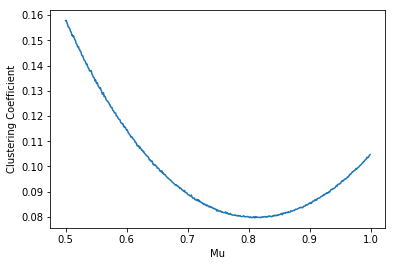

<Figure size 432x288 with 0 Axes>

In [11]:
def test(mu):
    g = klemm_eguiluz(1000, 20, mu)
    return nx.average_clustering(g)

test = np.vectorize(test)

def mtest(mu):
    res = test(np.full(100, mu))
    print(f"Done with mu = {mu}")
    return np.mean(res)

mtest = np.vectorize(mtest)

results = mtest(np.arange(0.5, 1, 0.001))
plt.plot(np.arange(0.5, 1, 0.001), results)
plt.xlabel("Mu")
plt.ylabel("Clustering Coefficient")
plt.show()
plt.savefig("KE Model Mu 05.png")

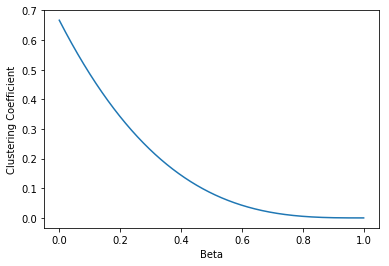

In [16]:
# Drawing graph of C against beta for watts-strogatz mode, assuming k = 10

x_range = np.arange(0, 1, 0.0001)
k = 10
y_res = ((3*(k-2)) / (4*(k-1)) *((1 - x_range)**3))

plt.clf()
plt.plot(x_range, y_res)
plt.xlabel('Beta')
plt.ylabel('Clustering Coefficient')
plt.show()